In [26]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")

import controllers.learner.datasets as ds

In [27]:
import time
from datetime import datetime, date
import calendar

start_time = calendar.timegm(date(2017, 10, 9).timetuple())
end_time = calendar.timegm(date(2017, 10, 11).timetuple())
username = "sean"

In [28]:
x, y, classes, counts = ds.get_hue_dataset2(username, start_time, end_time, incl_pose=True, incl_feats=False)

8


In [15]:
import numpy as np

x = np.array(x)
y = np.array(y)

for count in counts[:10]:
    print(count)
print(classes, x.shape, y.shape)

((1.0, 1.0, 33862.0, 50.0, 122.0, 1.0, 1.0, 0.0, 0.0, 213.0, 0.0, 0.0, 0.0, 0.0, 0.0), 11)
((1.0, 1.0, 33862.0, 50.0, 112.0, 1.0, 1.0, 0.0, 0.0, 117.0, 0.0, 0.0, 0.0, 0.0, 0.0), 11)
[(1.0, 1.0, 33862.0, 50.0, 122.0, 1.0, 1.0, 0.0, 0.0, 213.0, 0.0, 0.0, 0.0, 0.0, 0.0), (1.0, 1.0, 33862.0, 50.0, 112.0, 1.0, 1.0, 0.0, 0.0, 117.0, 0.0, 0.0, 0.0, 0.0, 0.0)] (22, 55) (22,)


0 / 22


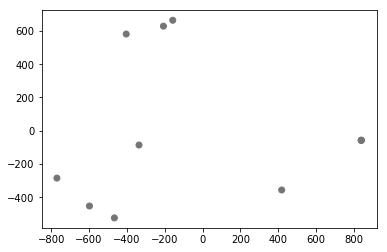

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA    
from sklearn.manifold import TSNE

%matplotlib inline
tsne = PCA(n_components=2)
x_red = tsne.fit_transform(x[y != 0])

import matplotlib
colors = []

for i, label in enumerate(y[y != 0]):
    if i % 1000 == 0:
        print(i, "/", len(y), flush=True)
    
    if label == len(classes):
        hsb = [1.0, 0, 0]
    else:
        hue_class = classes[label]
        #hsb = [hue_class[2]/65536.0, hue_class[3]/255.0, hue_class[4]/255.0]
        hsb = [hue_class[7]/65536.0, hue_class[8]/255.0, hue_class[9]/255.0]
    rgb = matplotlib.colors.hsv_to_rgb(hsb)
    colors.append(rgb)

plt.scatter(x_red[:,0][::-1], x_red[:,1][::-1], c=colors)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

np.random.seed(1984)
#shuffle_i = np.random.permutation(np.arange(len(x)))

N = len(x)
train_x, test_x = x, x#x[:N//2], x[N//2:]
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)
train_y, test_y = y, y#y[:N//2], y[N//2:]

In [21]:
def fit(clf):
    t = time.time()
    clf.fit(train_x, train_y)
    print("time:", time.time()-t)
    print(clf.score(train_x, train_y))
    print(clf.score(test_x, test_y))
    
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, class_weight="balanced")
print("random forest")
fit(clf)

"""
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10,))
print("neural")
fit(clf)

from sklearn import svm
clf = svm.SVC()
print("svm")
fit(clf)

clf = svm.LinearSVC()
print("linear svm")
fit(clf)
"""

random forest
time: 0.026213645935058594
0.954545454545
0.954545454545


'\nfrom sklearn.neural_network import MLPClassifier\nclf = MLPClassifier(hidden_layer_sizes=(10,))\nprint("neural")\nfit(clf)\n\nfrom sklearn import svm\nclf = svm.SVC()\nprint("svm")\nfit(clf)\n\nclf = svm.LinearSVC()\nprint("linear svm")\nfit(clf)\n'

NameError: name 'MLPClassifier' is not defined

In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train_y, clf.predict(train_x)))
print(confusion_matrix(test_y, clf.predict(test_x)))

[[11  0]
 [ 1 10]]
[[11  0]
 [ 1 10]]


In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train_y, clf.predict(train_x)))
print(confusion_matrix(test_y, clf.predict(test_x)))

[[11  0]
 [ 1 10]]
[[11  0]
 [ 1 10]]


In [24]:
import pickle
pickle.dump({"classes": classes, "classifier": clf, "preprocessor": scaler}, open("classifier.pkl", "wb+"))

In [25]:
print(classes)

[(1.0, 1.0, 33862.0, 50.0, 122.0, 1.0, 1.0, 0.0, 0.0, 213.0, 0.0, 0.0, 0.0, 0.0, 0.0), (1.0, 1.0, 33862.0, 50.0, 112.0, 1.0, 1.0, 0.0, 0.0, 117.0, 0.0, 0.0, 0.0, 0.0, 0.0)]
